## analysis for threshold results
raw results found in `notebooks/results/` folder.

/var/folders/0n/qy9bpgnd0xngmd0585cyt9nm0000gn/T/ipykernel_34711/3469816579.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


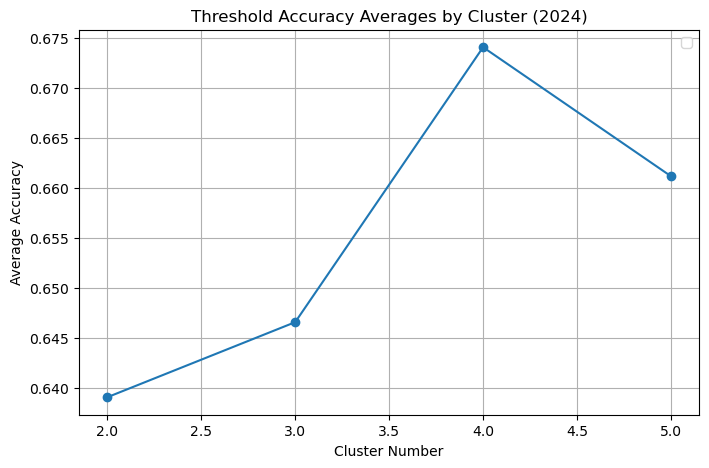

In [ ]:
import os
import re
import matplotlib.pyplot as plt

FILE_PATH = "../results/cluster_"
CLUSTERS = ["2", "3", "4", "5"]
YEAR = "2024"

# Store averages for each cluster
cluster_averages = []

for cluster in CLUSTERS:
    cluster_dir = f"{FILE_PATH}{cluster}_threshold"
    cluster_avg = []
    for root, _, files in os.walk(cluster_dir):
        for file in files:
            if file.endswith(f"_{YEAR}.txt"):
                file_path = os.path.join(root, file)
                with open(file_path, "r") as f:
                    content = f.read()
                    # Find the averages line at the bottom
                    match = re.search(r"average accuracy: (\d+\.\d+)", content)
                    if match:
                        avg_accuracy = eval(match.group(1))
                        cluster_avg.append(avg_accuracy)
    # Compute mean for this cluster
    cluster_averages.append(sum(cluster_avg)/len(cluster_avg) if cluster_avg else 0)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot([int(c) for c in CLUSTERS], cluster_averages, marker='o')
plt.xlabel("Cluster Number")
plt.ylabel("Average Accuracy")
plt.title(f"Threshold Accuracy Averages by Cluster ({YEAR})")
plt.legend()
plt.grid(True)
plt.savefig(f"threshold_accuracy_averages_by_cluster_{YEAR}.png")
plt.show()


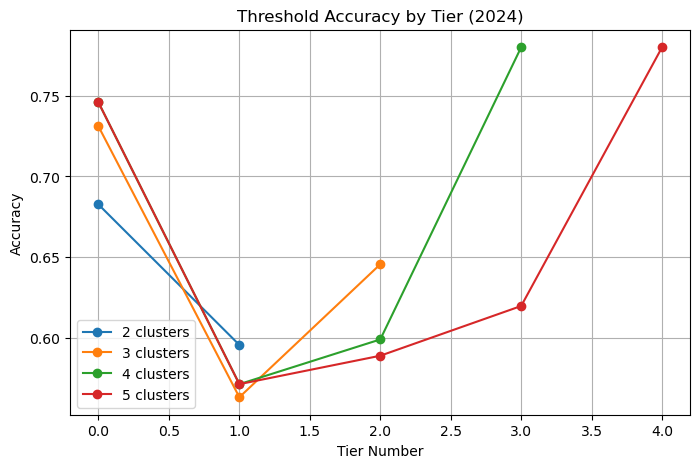

In [ ]:
import os
import re
import matplotlib.pyplot as plt

FILE_PATH = "../results/cluster_"
CLUSTERS = ["2", "3", "4", "5"]
TIERS = ["0", "1", "2", "3", "4"]
YEAR = "2024"

plt.figure(figsize=(8, 5))
for cluster in CLUSTERS:
    tier_accuracies = []
    cluster_dir = f"{FILE_PATH}{cluster}_threshold"
    for tier in TIERS:
        # Find files for this tier
        tier_files = [f for f in os.listdir(cluster_dir) if f.startswith(f"threshold_results_tier_{tier}_") and f.endswith(f"_{YEAR}.txt")]
        for file in tier_files:
            file_path = os.path.join(cluster_dir, file)
            with open(file_path, "r") as f:
                content = f.read()
                match = re.search(r"average accuracy: (\d+\.\d+)", content)
                if match:
                    avg_accuracy = eval(match.group(1))
                    tier_accuracies.append(avg_accuracy)
    # Ensure tier_accuracies has same length as TIERS, filling missing values with None
    x_tiers = [int(t) for t in TIERS]
    y_accuracies = [tier_accuracies[i] if i < len(tier_accuracies) else None for i in range(len(x_tiers))]
    plt.plot(x_tiers, y_accuracies, marker='o', label=f"{cluster} clusters")
plt.xlabel("Tier Number")
plt.ylabel("Accuracy")
plt.title(f"Threshold Accuracy by Tier ({YEAR})")
plt.legend()
plt.grid(True)
plt.savefig(f"threshold_accuracy_by_tier_{YEAR}.png")
plt.show()
